# TASK 1

In [1]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-w4zoub6i because the default path (/home/group_3/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


# Derivative of Sigmoid function for backprop
def sigmoid_derivative(x):
    return x * (1.0 - x)

In [3]:
# Define the neural network
class NeuralNetwork:
    def __init__(self, x, y, n):
        self.input = x
        self.neuron = n
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron)  # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)  # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape)  # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # Weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2

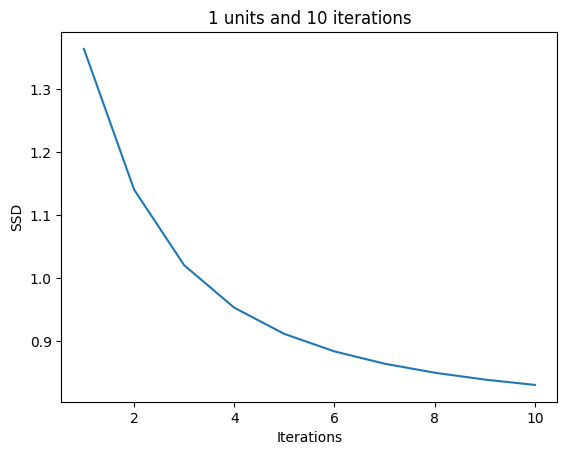

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.36172276]
 [0.32784286]
 [0.32992866]
 [0.30507047]]
The lowest SSD is: 0.8301042595619181
------------------


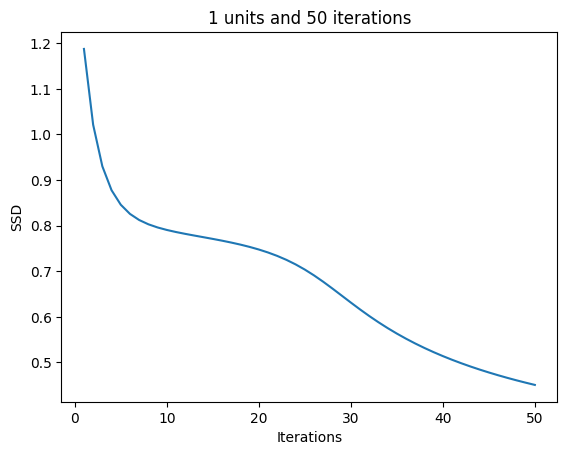

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.08602432]
 [0.22013751]
 [0.22547431]
 [0.41340431]]
The lowest SSD is: 0.4507938762095352
------------------


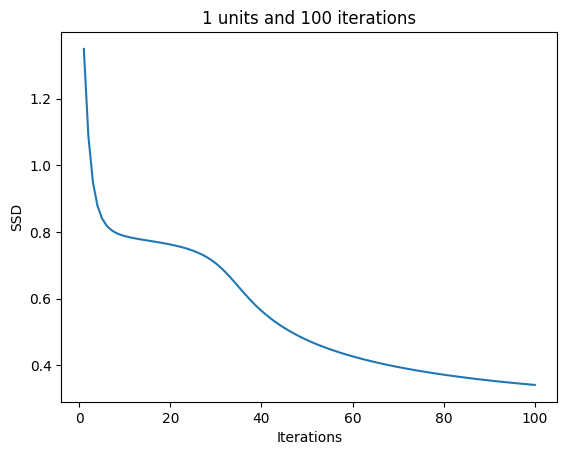

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.02157973]
 [0.13989182]
 [0.14046326]
 [0.4509721 ]]
The lowest SSD is: 0.3411969699954062
------------------


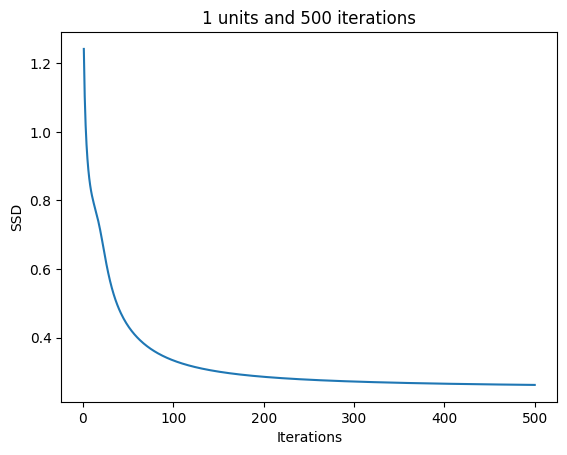

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.00168907]
 [0.04284238]
 [0.04284237]
 [0.49174569]]
The lowest SSD is: 0.26199623831634733
------------------


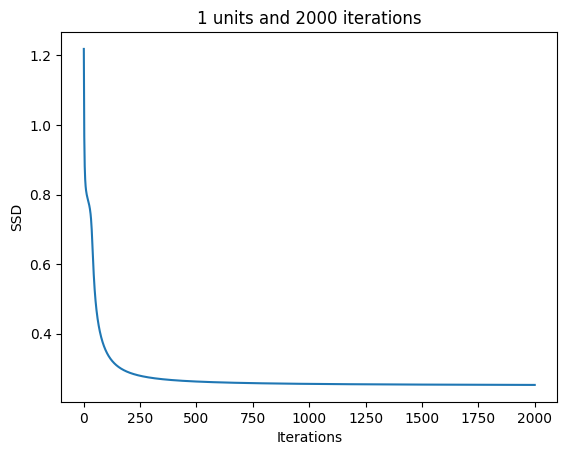

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.62289611e-04]
 [1.84322637e-02]
 [1.84322637e-02]
 [4.98103930e-01]]
The lowest SSD is: 0.2525793758706116
------------------


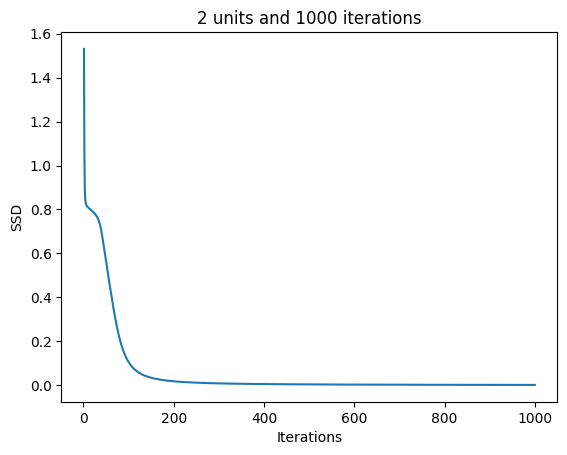

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[7.09096395e-04]
 [1.65849184e-02]
 [1.80402399e-02]
 [9.70425060e-01]]
The lowest SSD is: 0.0014756896516980103
------------------


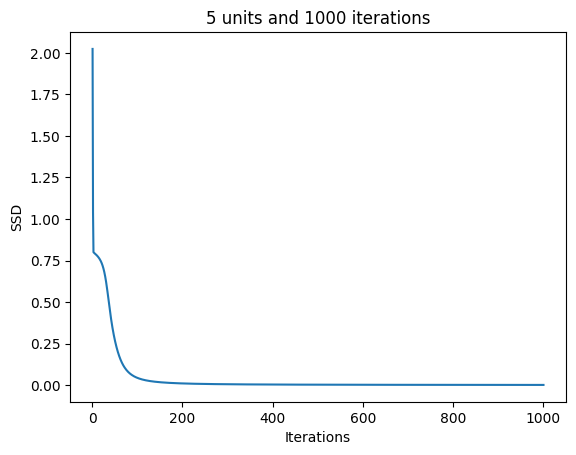

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[3.22624413e-05]
 [1.47905934e-02]
 [1.41518382e-02]
 [9.77578520e-01]]
The lowest SSD is: 0.0009217599959227677
------------------


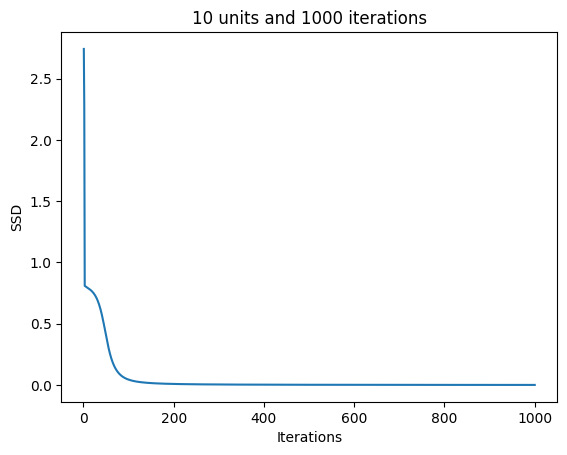

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[3.91629763e-05]
 [1.42740228e-02]
 [1.43034743e-02]
 [9.80478310e-01]]
The lowest SSD is: 0.0007894350162766026
------------------


In [4]:
Input = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
Target = np.array([[0], [0], [0], [1]])

iterations = [10, 50, 100, 500, 2000, 1000, 1000, 1000]
units = [1, 1, 1, 1, 1, 2, 5, 10]
for n_unit, n_iteration in zip(units, iterations):
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for i in range(n_iteration):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output) ** 2
        SSD.append(np.sum(errors))  # Objective(loss) function
    Itr = np.linspace(1, len(SSD), len(SSD))
    plt.plot(Itr, SSD)
    plt.title(f"{n_unit} units and {n_iteration} iterations")
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    plt.show()

    # Print the results
    print("The target values are:", Target)
    print("The predicted values are:", model.output)
    print("The lowest SSD is:", min(SSD))
    print("------------------")